<a href="https://colab.research.google.com/github/Jenny000327/Data_analysis/blob/main/6_%EC%87%BC%ED%95%91_%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8_%ED%82%A4%EC%9B%8C%EB%93%9C%EB%B3%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%A1%B0%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd

# API 요청 정보 설정
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords"

headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
    'Content-Type': 'application/json'
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000167",
    "keyword": [
        {"name": "여성패션/여성의류", "param": ["원피스"]},
        {"name": "여성패션/여성의류", "param": ["스커트"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

# API 요청 및 결과 처리
response = requests.post(url, headers=headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    
    # 결과 출력
    for trend in result['results']:
        print("[{}]".format(trend['title']))
        for data in trend['data']:
            print("- {} : {:.2f}%".format(data['period'], data['ratio']))
        print()
else:
    print("Error {}: {}".format(response.status_code, response.text))


[여성패션/여성의류]
- 2022-12-26 : 32.78%
- 2023-01-02 : 35.16%
- 2023-01-09 : 43.80%
- 2023-01-16 : 37.85%
- 2023-01-23 : 51.43%
- 2023-01-30 : 47.11%
- 2023-02-06 : 57.75%
- 2023-02-13 : 100.00%
- 2023-02-20 : 68.69%
- 2023-02-27 : 97.92%



시각화

[여성패션/여성의류]
- 2022-12-26 : 32.78%
- 2023-01-02 : 35.16%
- 2023-01-09 : 43.80%
- 2023-01-16 : 37.85%
- 2023-01-23 : 51.43%
- 2023-01-30 : 47.11%
- 2023-02-06 : 57.75%
- 2023-02-13 : 100.00%
- 2023-02-20 : 68.69%
- 2023-02-27 : 97.92%



/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

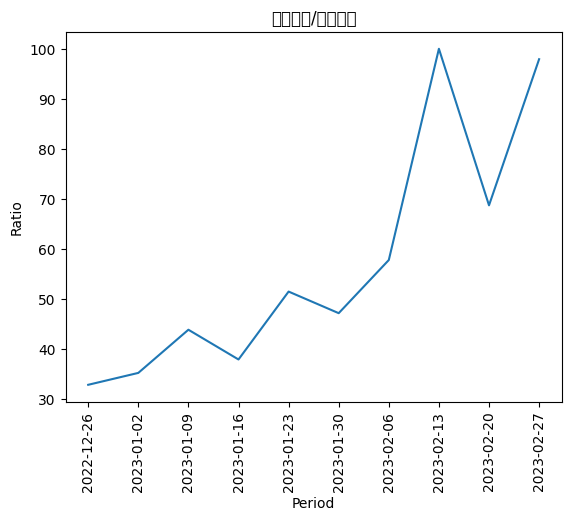

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# API 요청 정보 설정
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords"

headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
    'Content-Type': 'application/json'
}

data = {
    "startDate": "2023-01-01",
    "endDate": "2023-02-28",
    "timeUnit": "week",
    "category": "50000167",
    "keyword": [
        {"name": "여성패션/여성의류", "param": ["원피스"]},
        {"name": "여성패션/여성의류", "param": ["스커트"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

# API 요청 및 결과 처리
response = requests.post(url, headers=headers, data=json.dumps(data))

if response.status_code == 200:
    result = response.json()
    
    # 결과 출력
    for trend in result['results']:
        print("[{}]".format(trend['title']))
        for data in trend['data']:
            print("- {} : {:.2f}%".format(data['period'], data['ratio']))
        print()
        
        # pandas DataFrame으로 변환하기
        df = pd.DataFrame(trend['data'], columns=['period', 'ratio'])
        
        # 그래프 그리기
        plt.plot(df['period'], df['ratio'])
        plt.title(trend['title'])
        plt.xlabel('Period')
        plt.ylabel('Ratio')
        plt.xticks(rotation=90)
        plt.show()
else:
    print("Error {}: {}".format(response.status_code, response.text))
